# Curve Fitting

Fit a curve as closely as possible to a set of given points.

## Motivation

TODO TODO TODO

# Regression

## Linear Regression

We want to fit a line of the general form

$$y = ax + b$$

to a set of points $(x_1,y_1), (x_2,y_2), (x_3,y_3),\ldots, (x_n,y_n)$

![Linear Regression](https://uc-r.github.io/public/images/analytics/regression/sq.errors-1.png)

If we express those points as 

$$y_i = \beta_0 + \beta_1 x_i + e_i$$ 

We have an objective for an optimization problem: minimize the error terms $e_i$. More precisely, we'll minimize the square errors.

$$\min_{\beta_0, \beta_1}\sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \beta_0 -\beta_1x_i)^2$$

TODO: slide 8 section 5

### Linear Regression with Python

Very easy to do with the [scikit-learn](https://scikit-learn.org/) package.

scikit-learn works flawlessly with numpy and also allows us to fit Machine Learning models that are a lot more flexible, like Random Forests or Artificial Neural Networks.

#### Example 

Create random points that approximately fit the line

$$y = 2x + 10$$

Plot them, fit a line using `LinearRegression` from the `sklearn.linear_model` package, and plot both the points and the line together.

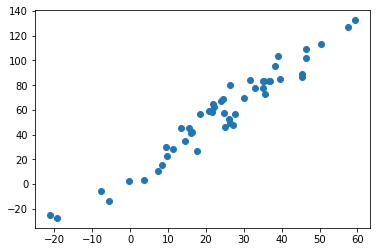

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

npoints = 50
xs = 20 *  np.random.randn(npoints) + 30
ys = 2 * xs + 10 + np.random.randn(npoints) * 10

plt.scatter(xs, ys);

In [2]:
lm = LinearRegression()
lm.fit(xs.reshape(-1,1), ys)

lm.coef_, lm.intercept_

(array([2.07092181]), 7.453164014316762)

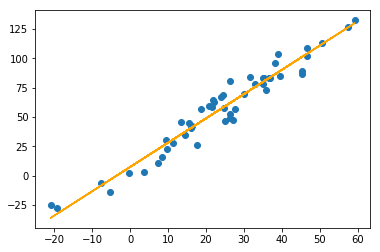

In [3]:
plt.scatter(xs, ys);
plt.plot(xs, lm.predict(xs.reshape(-1,1)), c='Orange')

### Multivariable linear regression with Python

Same thing, with more dimensions

In [4]:
# Create random input points
npoints = 50
ndims = 3
xs = 20 *  np.random.randn(npoints, ndims) + 30
ys = 2 * xs[:, 0] + 10 +\
     4 * xs[:, 1] - 15 +\
     7 * xs[:, 2] + 23 + np.random.randn(npoints) * 10

lm = LinearRegression()
lm.fit(xs, ys)

lm.coef_, lm.intercept_

(array([2.00012234, 3.98332559, 7.02949643]), 17.429071166896392)

## Polynomial Regression

It can be posed as a simple extension of linear regression, with new synthetic variables.

Then we can express it in vectorial form.

TODO

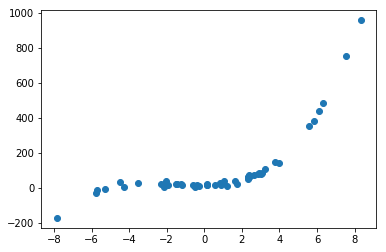

In [5]:
npoints = 50
xs = 3 *  np.random.randn(npoints)
ys = xs ** 3 + 5 * xs ** 2 + 2 * xs + 10 + np.random.randn(npoints) * 10

plt.scatter(xs, ys);

In [6]:
from sklearn.preprocessing import PolynomialFeatures

polyfeatures = PolynomialFeatures(degree=3)
polyfeatures.fit(xs.reshape(-1, 1))
synthetic_vars = polyfeatures.transform(xs.reshape(-1, 1))
synthetic_vars[:4,:]

array([[ 1.00000000e+00,  6.10243477e+00,  3.72397101e+01,
         2.27252902e+02],
       [ 1.00000000e+00,  2.93485244e+00,  8.61335886e+00,
         2.52789373e+01],
       [ 1.00000000e+00, -2.79961576e-01,  7.83784838e-02,
        -2.19429638e-02],
       [ 1.00000000e+00,  2.30793309e+00,  5.32655514e+00,
         1.22933329e+01]])

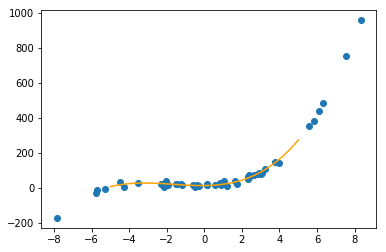

In [7]:
lm = LinearRegression()
lm.fit(synthetic_vars, ys)


xs_prediction = np.linspace(-5, 5)
ys_predicted = lm.predict(polyfeatures.transform(xs_prediction.reshape(-1,1)))

plt.scatter(xs, ys);
plt.plot(xs_prediction, ys_predicted, c='Orange')

# Interpolation

#### Example

Estimate $ln (2)$ using linear interpolation.

* First, perform the computation by interpolating between ln(1) = 0 and ln(6) = 1.791759.
* Then, repeat the procedure, but use a smaller interval from ln(1) to ln(4) = 1.386294.

Note that the true value of $ln(2)$ is 0.6931472.

In [10]:
# TODO

## Polynomial Interpolation

We can fit a polynomial of degree n if we have n + 1 data points. Then we can use it to interpolate between those points.

#### Example

Now estimate $ln (2)$ using quadratic interpolation. Use the points:

* $ln(1) = 0$
* $ln(4) = 1.386294$
* $ln(6) = 1.791759$

Note that the true value of $ln(2)$ is 0.6931472.

In [8]:
# TODO

## Spline Interpolation

Imagine we have 10 points. Rather than fit a single polynomial of degree 9, we can get a better result if we fit a different polynomial to each segment between two points. 

If we want to fit $n$ second order polynomials like this:

$$f_i(x) = a_i x^2 + b_i x + c_i$$

We will need to solve a linear system which has $3n$ equations. We can specify constraints which will each be represented by an equation in the system. In general, they will be restrictions on the values of the polynomials and their derivatives at the knots. Specifically:

* The function values of adjacent polynomials must be equal at the interior knots.
* The first and last functions must pass through the end points.
* The first derivatives at the interior knots must be equal.
* Assume that the second derivative is zero at the first point


#### Example

Fit the data in the following table using linear splines. Evaluate the function in x = 5.

|x|f(x)|
|---|---|
|3.0 |2.5|
|4.5 |1.0|
|7.0 |2.5|
|9.0 |0.5|

In [ ]:
#TODO

#### Example

Fit quadratic splines to the same data used in the previous example. Use the results to approximate the value of the underlying function at x = 5.

|x|f(x)|
|---|---|
|3.0 |2.5|
|4.5 |1.0|
|7.0 |2.5|
|9.0 |0.5|

In [ ]:
#TODO

#### Example

Fit cubic splines to the same data used in the previous example. Use the results to approximate the value of the underlying function at x = 5.

|x|f(x)|
|---|---|
|3.0 |2.5|
|4.5 |1.0|
|7.0 |2.5|
|9.0 |0.5|

In [11]:
#TODO

# Problems

#### Exercise

Estimate the common logarithm of 10 using linear interpolation.
* Interpolate between $log(8)= 0.9030900$ and $log(12) = 1.0791812$.
* Interpolate between $log(9)= 0.9542425$ and $log(11) = 1.0413927$. 

For each of the interpolations, compute the percent relative error based on the true value.

#### Exercise

Use the portion of the given steam table for superheated $H_2O$ at $200 MPa$ to 

* Find the corresponding entropy s for a specific volume v of 0.108 m 3 /kg with linear interpolation
* Find the same corresponding entropy using quadratic interpolation

| $v (m^3/kg)$ | $s(kJ/kg\cdot K)$ |
|---|---|
|0.10377|6.4147|
|0.11144|6.5453|
|0.1254|6.7664|

#### Exercise

The following data defines the sea-level concentration of
dissolved oxygen for fresh water as a function of temperature:

|$T,ºC$|$o, mg/l$|
|------|-----------|
|0|14.621|
|8|11.843|
|16|9.870|
|24|8.418|
|32|7.305|
|40|6.413|

Estimate $o(27)$ using 
* Linear interpolation
* Cubic splines. 

Note that the exact result is $7.986 mg/L$.

# Further Reading

TODO